# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from thefuzz import fuzz, process

pd.set_option('display.max_columns', None)

df = pd.read_csv('candyhierarchy2017.csv')

c:\users\auc\appdata\local\programs\python\python39\lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# make data usable
df.rename(columns= {
    "Internal ID":'inid',
    "Q1: GOING OUT?": 'going_out',
    "Q2: GENDER": 'gender',
    "Q3: AGE": 'age',
    "Q4: COUNTRY": 'country',
    "Q5: STATE, PROVINCE, COUNTY, ETC": 'state',
    "Q6 | 100 Grand Bar": 'grand_bar',
    "Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)": 'mary_janes',
    "Q6 | Any full-sized candy bar": 'full_candy_bar',
    "Q6 | Black Jacks": 'black_jacks',
    "Q6 | Bonkers (the candy)": 'bonkers_candy',
    "Q6 | Bonkers (the board game)": 'bonkers_game',
    "Q6 | Bottle Caps": 'bottle_caps',
    "Q6 | Box'o'Raisins": 'box_o_raisins',
    "Q6 | Broken glow stick": 'broken_glow_stick',
    "Q6 | Butterfinger": 'butterfinger',
    "Q6 | Cadbury Creme Eggs": 'cadbury_creme_eggs',
    "Q6 | Candy Corn": 'candy_corn',
    "Q6 | Candy that is clearly just the stuff given out for free at restaurants": 'free_candy',
    "Q6 | Caramellos": 'caramellos',
    "Q6 | Cash, or other forms of legal tender": 'legal_tender_cash',
    "Q6 | Chardonnay": 'chardonnay',
    "Q6 | Chick-o-Sticks (we don’t know what that is)": 'chick_o_sticks',
    "Q6 | Chiclets": 'chiclets',
    "Q6 | Coffee Crisp": 'coffee_crisp',
    "Q6 | Creepy Religious comics/Chick Tracts": 'creepy_tracts',
    "Q6 | Dental paraphenalia": 'dental_paraphenalia',
    "Q6 | Dots": 'dots',
    "Q6 | Dove Bars": 'dove_bars',
    "Q6 | Fuzzy Peaches": 'fuzzy_peaches',
    "Q6 | Generic Brand Acetaminophen": 'acetaminophen',
    "Q6 | Glow sticks": 'glow_sticks',
    "Q6 | Goo Goo Clusters": 'goo_goo_clusters',
    "Q6 | Good N' Plenty": 'good_plenty',
    "Q6 | Gum from baseball cards": 'baseball_cards_gum',
    "Q6 | Gummy Bears straight up": 'gummy_bears',
    "Q6 | Hard Candy": 'hard_candy',
    "Q6 | Healthy Fruit": 'healthy_fruit',
    "Q6 | Heath Bar": 'health_bar',
    "Q6 | Hershey's Dark Chocolate": 'hershey_dark_chocolate',
    "Q6 | Hershey’s Milk Chocolate": 'hershey_milk_chocolate',
    "Q6 | Hershey's Kisses": 'hershey_kisses',
    "Q6 | Hugs (actual physical hugs)": 'hugs',
    "Q6 | Jolly Rancher (bad flavor)": 'jolly_rancher_bad',
    "Q6 | Jolly Ranchers (good flavor)": 'jolly_rancher_good',
    "Q6 | JoyJoy (Mit Iodine!)": 'joy_joy',
    "Q6 | Junior Mints": 'joniour_mints',
    "Q6 | Senior Mints": 'senior_mints',
    "Q6 | Kale smoothie": 'kale_smoothie',
    "Q6 | Kinder Happy Hippo": 'kinder_happy_hippo',
    "Q6 | Kit Kat": 'kit_kat',
    "Q6 | LaffyTaffy": 'laffy_taffy',
    "Q6 | LemonHeads": 'lemon_heads',
    "Q6 | Licorice (yes black)": 'licorice_black',
    "Q6 | Licorice (not black)": 'licorice_nblack',
    "Q6 | Lindt Truffle": 'lindt_truffle',
    "Q6 | Lollipops": 'lollipops',
    "Q6 | Mars": 'mars',
    "Q6 | Maynards": 'maynards',
    "Q6 | Mike and Ike": 'mike_and_ike',
    "Q6 | Milk Duds": 'milk_duds',
    "Q6 | Milky Way": 'milky_way',
    "Q6 | Regular M&Ms": 'regular_mm',
    "Q6 | Peanut M&M’s": 'peanut_mm',
    "Q6 | Blue M&M's": 'blue_mm',
    "Q6 | Red M&M's": 'red_mm',
    "Q6 | Green Party M&M's": 'green_party_mm',
    "Q6 | Independent M&M's": 'independent_mm',
    "Q6 | Abstained from M&M'ing.": 'no_mm',
    "Q6 | Minibags of chips": 'minibags_chips',
    "Q6 | Mint Kisses": 'mint_kisses',
    "Q6 | Mint Juleps": 'mint_juleps',
    "Q6 | Mr. Goodbar": 'mr_goodbar',
    "Q6 | Necco Wafers": 'necco_wafers',
    "Q6 | Nerds": 'nerds',
    "Q6 | Nestle Crunch": 'nestle_crunch',
    "Q6 | Now'n'Laters": 'now_n_laters',
    "Q6 | Peeps": 'peeps',
    "Q6 | Pencils": 'pencils',
    "Q6 | Pixy Stix": 'pixy_stix',
    "Q6 | Real Housewives of Orange County Season 9 Blue-Ray": 'rhoocs_blueray',
    "Q6 | Reese’s Peanut Butter Cups": 'reese_peanut_butter_cup',
    "Q6 | Reese's Pieces": 'reese_pieces',
    "Q6 | Reggie Jackson Bar": 'reggie_jackson_bar',
    "Q6 | Rolos": 'rolos',
    "Q6 | Sandwich-sized bags filled with BooBerry Crunch": 'booberry_crunch',
    "Q6 | Skittles": 'skittles',
    "Q6 | Smarties (American)": 'american_smarties',
    "Q6 | Smarties (Commonwealth)": 'commonwelth_smarties',
    "Q6 | Snickers": 'snickers',
    "Q6 | Sourpatch Kids (i.e. abominations of nature)": 'sourpatch_kids',
    "Q6 | Spotted Dick": 'spotted_dick',
    "Q6 | Starburst": 'starburst',
    "Q6 | Sweet Tarts": 'sweet_tarts',
    "Q6 | Swedish Fish": 'swedish_fish',
    "Q6 | Sweetums (a friend to diabetes)": 'sweetums',
    "Q6 | Take 5": 'take5',
    "Q6 | Tic Tacs": 'tic_tacs',
    "Q6 | Those odd marshmallow circus peanut things": 'marshmallow_circus_peanut',
    "Q6 | Three Musketeers": 'three_musketeers',
    "Q6 | Tolberone something or other": 'tolberone_other',
    "Q6 | Trail Mix": 'trail_mix',
    "Q6 | Twix": 'twix',
    "Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein": 'fructose_corn_syrup',
    "Q6 | Vicodin": 'vicodin',
    "Q6 | Whatchamacallit Bars": 'watchamacallit_bars',
    "Q6 | White Bread": 'white_bread',
    "Q6 | Whole Wheat anything": 'whole_wheat_anything',
    "Q6 | York Peppermint Patties": 'york_peppermint_patties',
    "Q7: JOY OTHER": 'other_joy',
    "Q8: DESPAIR OTHER": 'other_despair',
    "Q9: OTHER COMMENTS": 'other_commemts',
    "Q10: DRESS": "dress",
    "Q11: DAY": 'day_prefer',
    "Q12: MEDIA [Daily Dish]": "media_dailydish",
    "Q12: MEDIA [Science]": "media_science",
    "Q12: MEDIA [ESPN]": "media_espn",
    "Q12: MEDIA [Yahoo]": "media_yahoo",
    "Click Coordinates (x, y)": "x_y",
    
}, inplace=True, errors='raise')

In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 120 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    inid                       2460 non-null   int64  
 1    going_out                  2350 non-null   object 
 2    gender                     2419 non-null   object 
 3    age                        2376 non-null   object 
 4    country                    2396 non-null   object 
 5    state                      2360 non-null   object 
 6    grand_bar                  1713 non-null   object 
 7    mary_janes                 1726 non-null   object 
 8    full_candy_bar             1788 non-null   object 
 9    black_jacks                1502 non-null   object 
 10   bonkers_candy              1468 non-null   object 
 11   bonkers_game               1454 non-null   object 
 12   bottle_caps                1695 non-null   object 
 13   box_o_raisins              1772

In [4]:
df['media_dailydish'].unique()

array([nan,  1.])

In [5]:
df['media_dailydish']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2455    NaN
2456    NaN
2457    NaN
2458    NaN
2459    1.0
Name: media_dailydish, Length: 2460, dtype: float64

In [6]:
df['media_dailydish'].isnull().count()

2460

In [7]:
df.shape

(2460, 120)

# 2- show some general properties for the data 

In [8]:
df.count()

inid               2460
going_out          2350
gender             2419
age                2376
country            2396
                   ... 
media_dailydish      85
media_science      1362
media_espn           99
media_yahoo          67
x_y                1605
Length: 120, dtype: int64

In [9]:
df.loc[df.isna().all(axis=1)]

,inid,going_out,gender,age,country,state,grand_bar,mary_janes,full_candy_bar,black_jacks,bonkers_candy,bonkers_game,bottle_caps,box_o_raisins,broken_glow_stick,butterfinger,cadbury_creme_eggs,candy_corn,free_candy,caramellos,legal_tender_cash,chardonnay,chick_o_sticks,chiclets,coffee_crisp,creepy_tracts,dental_paraphenalia,dots,dove_bars,fuzzy_peaches,acetaminophen,glow_sticks,goo_goo_clusters,good_plenty,baseball_cards_gum,gummy_bears,hard_candy,healthy_fruit,health_bar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mm,independent_mm,no_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,rhoocs_blueray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,Unnamed: 113,day_prefer,media_dailydish,media_science,media_espn,media_yahoo,x_y


In [10]:
df.columns

Index(['inid', 'going_out', 'gender', 'age', 'country', 'state', 'grand_bar',
       'mary_janes', 'full_candy_bar', 'black_jacks',
       ...
       'other_despair', 'other_commemts', 'dress', 'Unnamed: 113',
       'day_prefer', 'media_dailydish', 'media_science', 'media_espn',
       'media_yahoo', 'x_y'],
      dtype='object', length=120)

In [11]:
df.describe()

,inid,media_dailydish,media_science,media_espn,media_yahoo
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [12]:
df['media_science'].unique()

array([nan,  1.])

In [13]:
df.head()

,inid,going_out,gender,age,country,state,grand_bar,mary_janes,full_candy_bar,black_jacks,bonkers_candy,bonkers_game,bottle_caps,box_o_raisins,broken_glow_stick,butterfinger,cadbury_creme_eggs,candy_corn,free_candy,caramellos,legal_tender_cash,chardonnay,chick_o_sticks,chiclets,coffee_crisp,creepy_tracts,dental_paraphenalia,dots,dove_bars,fuzzy_peaches,acetaminophen,glow_sticks,goo_goo_clusters,good_plenty,baseball_cards_gum,gummy_bears,hard_candy,healthy_fruit,health_bar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mm,independent_mm,no_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,rhoocs_blueray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,Unnamed: 113,day_prefer,media_dailydish,media_science,media_espn,media_yahoo,x_y
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,9

# 3- write summary about what you get form the above functions
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , ....

# cleaning

### 4- drop all the useless columns and  rows with too much NaN , 
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN 
- rename columns for easy access

In [14]:
df.drop(['Unnamed: 113', 'inid', 'media_yahoo', 'media_espn', 'media_dailydish'], axis=1, inplace=True);

In [15]:
df.dropna(axis=0, how='all', inplace=True)

In [16]:
df.shape

(2439, 115)

In [17]:
df.dropna(axis=0, thresh=df.shape[1] * .1, inplace=True)

In [18]:
df.shape

(1801, 115)

### 5 - clean `going out` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [19]:
df['going_out'].head()

1    No
3    No
4    No
5    No
7    No
Name: going_out, dtype: object

In [20]:
df['going_out'].isnull().sum()

63

In [21]:
df['going_out'].unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
df['going_out'].describe()

count     1738
unique       2
top         No
freq      1500
Name: going_out, dtype: object

In [23]:
df['going_out'] = df['going_out'].str.lower();

In [24]:
df.loc[df.going_out == 'yes', 'going_out'].count() / 2350 * 100

10.127659574468085

In [25]:
df['going_out'].fillna(method='bfill').describe()

count     1801
unique       2
top         no
freq      1554
Name: going_out, dtype: object

In [26]:
df['going_out'].fillna(method='bfill').loc[df.going_out == "yes"].count() / 2460 * 100

9.674796747967479

In [27]:
df['going_out'].fillna(method='bfill', inplace=True);

### 6 - clean ` gender` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [28]:
df['gender'].head()

1    Male
3    Male
4    Male
5    Male
7    Male
Name: gender, dtype: object

In [29]:
df['gender'].unique()

array(['Male', 'Female', "I'd rather not say", 'Other', nan], dtype=object)

In [30]:
df['gender'].describe()

count     1791
unique       4
top       Male
freq      1086
Name: gender, dtype: object

In [31]:
df['gender'].isna().sum()

10

In [32]:
df.loc[df.gender == "I'd rather not say", 'gender'].count()

61

In [33]:
df.loc[df.gender == "Other", 'gender'].count()

26

In [34]:
df['gender'].fillna(method='bfill').describe()

count     1801
unique       4
top       Male
freq      1090
Name: gender, dtype: object

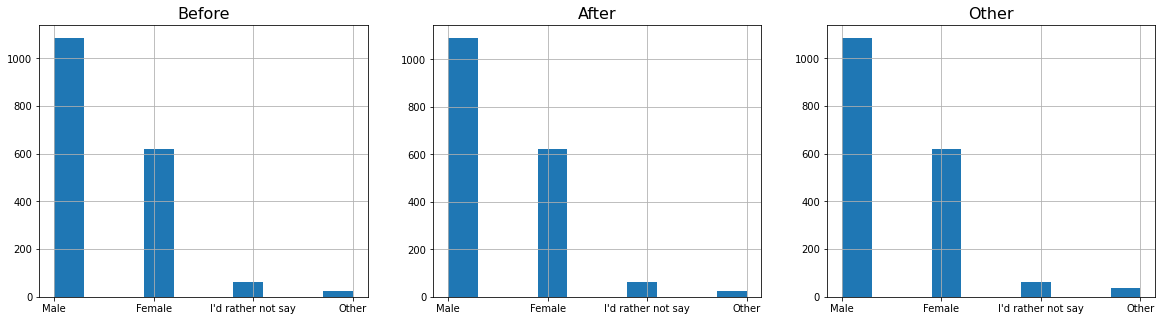

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
df['gender'].hist(ax=axes[0])
df['gender'].fillna(method='bfill').hist(ax=axes[1])
df['gender'].fillna('Other').hist(ax=axes[2])
axes[0].set_title("Before", fontsize=16)
axes[1].set_title("After", fontsize=16)
axes[2].set_title("Other", fontsize=16)
plt.show()

In [36]:
df['gender'].fillna(method='bfill', inplace=True)

In [37]:
df['gender'].tail()

2454    Female
2455      Male
2456    Female
2457    Female
2459    Female
Name: gender, dtype: object

### 7 - clean ` age` column 
> tip : note the type of age column , and NaN values
 - try to use `to_numeric` 
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [38]:
df['age'].head()

1     44
3     40
4     23
5    NaN
7     33
Name: age, dtype: object

In [39]:
df['age'].unique()

array(['44', '40', '23', nan, '33', '53', '56', '64', '43', '37', '59',
       '48', '45', '49', '34', '35', '38', '58', '50', '47', '52', '63',
       '65', '41', '31', '61', '46', '54', '62', '29', '42', '39', '36',
       '32', '28', '69', '67', '30', '25', '22', '51', '70', '24', '27',
       '18', '19', 'Old enough', '57', '66', '12', 'Many', '60', '55',
       '?', '21', '11', 'no', '68', '20', '6', '10', '71', '90', '13',
       '26', '45-55', '312', '72', '99', 'hahahahaha', '9', '88', '39.4',
       '74', '102', 'older than dirt', '15', '8', '75', '17', 'Enough',
       'See question 2', '24-50', '7', '14', 'Over 50', '76', '100',
       '1000', '16', '46 Halloweens.', 'ancient', '77', 'OLD', 'old',
       'MY NAME JEFF', '4', '73', '59 on the day after Halloween',
       'old enough', 'I can remember when Java was a cool new language'],
      dtype=object)

In [40]:
df['age'].isna().sum()

35

In [41]:
df.loc[df.age == '59 on the day after Halloween', 'age'] = '59'

In [42]:
df.loc[df.age == '46 Halloweens.', 'age'] = '46'

In [43]:
df.loc[df.age == 'Over 50', 'age'] = '55'

In [44]:
df.loc[df.age == '39.4', 'age'] = '39'

In [45]:
# Another Approach (Hard)
def clearAge():
    filteredAge = df.age.str.isnumeric()
    filteredAge.fillna(False, inplace=True) #good age

    df.loc[~filteredAge, 'age'] = np.nan
    
    #do a quick test to find mean/midean/mode
    df.age.fillna(0).astype(int).describe()

In [46]:
df.age = pd.to_numeric(df.age, errors='coerce')

In [47]:
df.age = df.age.fillna(42).astype(int)

In [48]:
df.age.describe()

count    1801.000000
mean       43.449750
std        26.259641
min         4.000000
25%        35.000000
50%        42.000000
75%        50.000000
max      1000.000000
Name: age, dtype: float64

In [49]:
assert df.age.dtype == int

### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways 
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [50]:
df.country.isna().sum()

21

In [51]:
df.country = df.country.str.strip()
df.country = df.country.str.lower()

In [52]:
df.country.unique()

array(['usa', 'us', nan, 'canada', 'murica', 'uk', 'united states',
       'united staes', 'united kingdom', 'united states of america',
       'uae', 'england', 'u.s.a.', 'usausausa', 'america', 'france',
       'mexico', 'us of a', 'unites states', 'the united states',
       'north carolina', 'netherlands', 'europe', 'earth', 'u s', 'u.s.',
       'costa rica', 'the united states of america', 'cascadia',
       'insanity lately', 'greece', 'usa? hard to tell anymore..',
       "'merica", 'pittsburgh', 'united state', 'a', 'can', 'canae',
       'new york', 'trumpistan', 'ireland', 'united sates', 'korea',
       'australia', 'california', 'japan',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'switzerland',
       'ahem....amerca', 'south korea', 'new jersey', 'united stated',
       'germany', 'united statss', 'endland', 'atlantis', 'murrika',
       'alaska', 'n. america', 'singapore', 'ussa', 'ta

In [53]:
df.loc[df.country == 'fear and loathing']

,going_out,gender,age,country,state,grand_bar,mary_janes,full_candy_bar,black_jacks,bonkers_candy,bonkers_game,bottle_caps,box_o_raisins,broken_glow_stick,butterfinger,cadbury_creme_eggs,candy_corn,free_candy,caramellos,legal_tender_cash,chardonnay,chick_o_sticks,chiclets,coffee_crisp,creepy_tracts,dental_paraphenalia,dots,dove_bars,fuzzy_peaches,acetaminophen,glow_sticks,goo_goo_clusters,good_plenty,baseball_cards_gum,gummy_bears,hard_candy,healthy_fruit,health_bar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mm,independent_mm,no_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,rhoocs_blueray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,day_prefer,media_science,x_y
2413,yes,Male,42,fear and loathing,Psychotic,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,MEH,JOY,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,MEH,MEH,DESPAIR,JOY,DESPAIR,JOY,NaN,MEH,MEH,MEH,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,MEH,JOY,JOY,MEH,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,DESPAIR,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,MEH,MEH,MEH,MEH,JOY,DESPAIR,MEH,JOY,MEH,MEH,JOY,MEH,MEH,MEH,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,Ergodox Keyboard,JavaScript,The world runs on compassion. The web runs on...,White and gold,Friday,NaN,"(96, 81)"


In [54]:
df.loc[df.country == 'subscribe to dm4uz3 on youtube']
#الله يسمحك يا سيدي ... ها ايه تاني ؟

,going_out,gender,age,country,state,grand_bar,mary_janes,full_candy_bar,black_jacks,bonkers_candy,bonkers_game,bottle_caps,box_o_raisins,broken_glow_stick,butterfinger,cadbury_creme_eggs,candy_corn,free_candy,caramellos,legal_tender_cash,chardonnay,chick_o_sticks,chiclets,coffee_crisp,creepy_tracts,dental_paraphenalia,dots,dove_bars,fuzzy_peaches,acetaminophen,glow_sticks,goo_goo_clusters,good_plenty,baseball_cards_gum,gummy_bears,hard_candy,healthy_fruit,health_bar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mm,independent_mm,no_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,rhoocs_blueray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,day_prefer,media_science,x_y
2214,yes,Male,42,subscribe to dm4uz3 on youtube,ur mom,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,watching dm4uz3's videos,ur mom,ur gay,Blue and black,Sunday,NaN,"(29, 91)"


In [55]:
df.loc[df.country == 'atlantis']


,going_out,gender,age,country,state,grand_bar,mary_janes,full_candy_bar,black_jacks,bonkers_candy,bonkers_game,bottle_caps,box_o_raisins,broken_glow_stick,butterfinger,cadbury_creme_eggs,candy_corn,free_candy,caramellos,legal_tender_cash,chardonnay,chick_o_sticks,chiclets,coffee_crisp,creepy_tracts,dental_paraphenalia,dots,dove_bars,fuzzy_peaches,acetaminophen,glow_sticks,goo_goo_clusters,good_plenty,baseball_cards_gum,gummy_bears,hard_candy,healthy_fruit,health_bar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mm,independent_mm,no_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,rhoocs_blueray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,day_prefer,media_science,x_y
1502,yes,I'd rather not say,1000,atlantis,"Emerald City, Petrolia",MEH,JOY,JOY,MEH,MEH,MEH,MEH,MEH,MEH,JOY,MEH,MEH,MEH,JOY,MEH,MEH,MEH,JOY,JOY,MEH,JOY,JOY,MEH,MEH,MEH,JOY,MEH,JOY,MEH,JOY,JOY,MEH,JOY,MEH,JOY,JOY,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,JOY,MEH,JOY,MEH,JOY,JOY,MEH,JOY,MEH,JOY,DESPAIR,MEH,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,MEH,MEH,JOY,DESPAIR,MEH,JOY,JOY,MEH,MEH,JOY,MEH,JOY,JOY,MEH,MEH,MEH,MEH,JOY,MEH,JOY,JOY,MEH,JOY,JOY,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,MEH,MEH,MEH,NaN,NaN,NaN,White and gold,Friday,1.0,"(76, 34)"


In [56]:
df.loc[df.country == 'insanity lately']

,going_out,gender,age,country,state,grand_bar,mary_janes,full_candy_bar,black_jacks,bonkers_candy,bonkers_game,bottle_caps,box_o_raisins,broken_glow_stick,butterfinger,cadbury_creme_eggs,candy_corn,free_candy,caramellos,legal_tender_cash,chardonnay,chick_o_sticks,chiclets,coffee_crisp,creepy_tracts,dental_paraphenalia,dots,dove_bars,fuzzy_peaches,acetaminophen,glow_sticks,goo_goo_clusters,good_plenty,baseball_cards_gum,gummy_bears,hard_candy,healthy_fruit,health_bar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mm,independent_mm,no_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,rhoocs_blueray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,day_prefer,media_science,x_y
638,yes,Other,42,insanity lately,oblivion if things keep going this way,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,JOY,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,MEH,DESPAIR,"cannabis brownies, sour beer, condoms, and dan...","bibles, church sermons, police, and maga hats",i would exchange a copy of rick & morty's 1st ...,White and gold,Friday,1.0,"(62, 6)"


In [57]:
df.loc[df.country == 'europe']

,going_out,gender,age,country,state,grand_bar,mary_janes,full_candy_bar,black_jacks,bonkers_candy,bonkers_game,bottle_caps,box_o_raisins,broken_glow_stick,butterfinger,cadbury_creme_eggs,candy_corn,free_candy,caramellos,legal_tender_cash,chardonnay,chick_o_sticks,chiclets,coffee_crisp,creepy_tracts,dental_paraphenalia,dots,dove_bars,fuzzy_peaches,acetaminophen,glow_sticks,goo_goo_clusters,good_plenty,baseball_cards_gum,gummy_bears,hard_candy,healthy_fruit,health_bar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mm,independent_mm,no_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,rhoocs_blueray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,day_prefer,media_science,x_y
433,yes,Female,10,europe,America,DESPAIR,MEH,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,MEH,JOY,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,JOY,JOY,DESPAIR,MEH,MEH,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,MEH,DESPAIR,MEH,JOY,MEH,MEH,MEH,JOY,JOY,MEH,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,JOY,JOY,JOY,JOY,MEH,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,JOY,Sugar Daddys,Caramel Onions,NaN,Blue and black,Friday,NaN,NaN


In [58]:
df.loc[df.country == "i don't know anymore"]

,going_out,gender,age,country,state,grand_bar,mary_janes,full_candy_bar,black_jacks,bonkers_candy,bonkers_game,bottle_caps,box_o_raisins,broken_glow_stick,butterfinger,cadbury_creme_eggs,candy_corn,free_candy,caramellos,legal_tender_cash,chardonnay,chick_o_sticks,chiclets,coffee_crisp,creepy_tracts,dental_paraphenalia,dots,dove_bars,fuzzy_peaches,acetaminophen,glow_sticks,goo_goo_clusters,good_plenty,baseball_cards_gum,gummy_bears,hard_candy,healthy_fruit,health_bar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mm,independent_mm,no_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,rhoocs_blueray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,day_prefer,media_science,x_y
2376,yes,Male,41,i don't know anymore,The Democratic People's Republic of North Caro...,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,MEH,MEH,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,MEH,DESPAIR,MEH,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,Cow Tails/Caramel Creams,Coupons for some ice cream joint that we don't...,How are you going to extract any usable data o...,White and gold,Sunday,NaN,"(29, 53)"


In [59]:
df.loc[df.country == 'earth']

,going_out,gender,age,country,state,grand_bar,mary_janes,full_candy_bar,black_jacks,bonkers_candy,bonkers_game,bottle_caps,box_o_raisins,broken_glow_stick,butterfinger,cadbury_creme_eggs,candy_corn,free_candy,caramellos,legal_tender_cash,chardonnay,chick_o_sticks,chiclets,coffee_crisp,creepy_tracts,dental_paraphenalia,dots,dove_bars,fuzzy_peaches,acetaminophen,glow_sticks,goo_goo_clusters,good_plenty,baseball_cards_gum,gummy_bears,hard_candy,healthy_fruit,health_bar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mm,independent_mm,no_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,rhoocs_blueray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,day_prefer,media_science,x_y
451,no,I'd rather not say,90,earth,Sub Earth,MEH,DESPAIR,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,JOY,JOY,MEH,MEH,JOY,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,JOY,JOY,MEH,JOY,JOY,MEH,MEH,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,JOY,NaN,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR,JOY,NaN,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,JOY,Book,3D printed figurine that looks like me melted ...,Why no spare change? More vegan options? Wha...,White and gold,Friday,1.0,"(77, 29)"


In [60]:
df.drop(df.loc[df.country == 'europe'].index, inplace=True)
df.drop(df.loc[df.country == 'insanity lately'].index, inplace=True)
df.drop(df.loc[df.country == 'atlantis'].index, inplace=True)
df.drop(df.loc[df.country == 'fear and loathing'].index, inplace=True)
df.drop(df.loc[df.country == 'subscribe to dm4uz3 on youtube'].index, inplace=True)
df.drop(df.loc[df.country == "i don't know anymore"].index, inplace=True)
df.drop(df.loc[df.country == "earth"].index, inplace=True)

In [61]:
df.loc[df.country == "narnia"]

,going_out,gender,age,country,state,grand_bar,mary_janes,full_candy_bar,black_jacks,bonkers_candy,bonkers_game,bottle_caps,box_o_raisins,broken_glow_stick,butterfinger,cadbury_creme_eggs,candy_corn,free_candy,caramellos,legal_tender_cash,chardonnay,chick_o_sticks,chiclets,coffee_crisp,creepy_tracts,dental_paraphenalia,dots,dove_bars,fuzzy_peaches,acetaminophen,glow_sticks,goo_goo_clusters,good_plenty,baseball_cards_gum,gummy_bears,hard_candy,healthy_fruit,health_bar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mm,independent_mm,no_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,rhoocs_blueray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,day_prefer,media_science,x_y
2072,no,Male,45,narnia,Pennsylvania,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,MEH,MEH,JOY,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,JOY,JOY,MEH,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,JOY,JOY,JOY,MEH,MEH,DESPAIR,Freshly baked chocolate cookies would be nice.,Those disgusting little bar thingies that were...,This was a fun survey.,White and gold,Friday,1.0,"(79, 32)"


In [62]:
df.loc[df.country == 'trumpistan']

,going_out,gender,age,country,state,grand_bar,mary_janes,full_candy_bar,black_jacks,bonkers_candy,bonkers_game,bottle_caps,box_o_raisins,broken_glow_stick,butterfinger,cadbury_creme_eggs,candy_corn,free_candy,caramellos,legal_tender_cash,chardonnay,chick_o_sticks,chiclets,coffee_crisp,creepy_tracts,dental_paraphenalia,dots,dove_bars,fuzzy_peaches,acetaminophen,glow_sticks,goo_goo_clusters,good_plenty,baseball_cards_gum,gummy_bears,hard_candy,healthy_fruit,health_bar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mm,independent_mm,no_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,rhoocs_blueray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,day_prefer,media_science,x_y
959,no,Male,43,trumpistan,Illinois,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,MEH,JOY,JOY,JOY,MEH,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,JOY,JOY,JOY,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,NaN,MEH,DESPAIR,JOY,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,MEH,beer,beer,Hail Satan,Blue and black,Friday,1.0,"(86, 34)"


In [63]:
# df.loc[df.country == 'I pretend to be from Canada, but I am really from the United States.', 'country'] = 'usa'
df.country.replace('north carolina', 'usa', inplace=True)
df.country.replace('alaska', 'usa', inplace=True)
df.country.replace('north carolina', 'usa', inplace=True)
df.country.replace('california', 'usa', inplace=True)
df.country.replace('new york', 'usa', inplace=True)
df.country.replace('new jersey', 'usa', inplace=True)
df.country.replace('pittsburgh', 'usa', inplace=True)
df.country.replace('trumpistan', 'usa', inplace=True)
df.country.replace('narnia', 'usa', inplace=True)
df.country.replace('usa? hard to tell anymore..', 'usa', inplace=True)
df.country.replace('uk', 'united kingdom', inplace=True)
df.country.replace('scotland', 'united kingdom', inplace=True)

In [64]:
def cleanCountry(search_word, replace_with = '', rate=80):
    replace_with = replace_with if replace_with else search_word
    
    matches = process.extract(search_word, df.country.unique(), limit=df.shape[0])
    for pmatch in matches:
        if pmatch[1] >= rate:
            df.loc[df.country == pmatch[0], 'country'] = replace_with

In [65]:
cleanCountry('usa', rate=67)
cleanCountry('united states', 'usa', rate=90)
cleanCountry('canada', rate=73)
cleanCountry('murica', 'usa', rate=66)
cleanCountry('south korea')
cleanCountry('england', 'united kingdom')

In [66]:
df.country.unique()

array(['usa', nan, 'canada', 'united kingdom', 'france', 'mexico',
       'netherlands', 'costa rica', 'cascadia', 'greece', 'ireland',
       'south korea', 'australia', 'japan', 'iceland', 'denmark',
       'switzerland', 'germany', 'singapore', 'taiwan', 'china', 'spain'],
      dtype=object)

In [67]:
df.country.astype('category');

In [68]:
df[df.country.isna()]

,going_out,gender,age,country,state,grand_bar,mary_janes,full_candy_bar,black_jacks,bonkers_candy,bonkers_game,bottle_caps,box_o_raisins,broken_glow_stick,butterfinger,cadbury_creme_eggs,candy_corn,free_candy,caramellos,legal_tender_cash,chardonnay,chick_o_sticks,chiclets,coffee_crisp,creepy_tracts,dental_paraphenalia,dots,dove_bars,fuzzy_peaches,acetaminophen,glow_sticks,goo_goo_clusters,good_plenty,baseball_cards_gum,gummy_bears,hard_candy,healthy_fruit,health_bar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mm,independent_mm,no_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,rhoocs_blueray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,day_prefer,media_science,x_y
5,no,Male,42,NaN,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,MEH,MEH,JOY,NaN,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,MEH,JOY,JOY,MEH,MEH,MEH,MEH,MEH,NaN,JOY,NaN,DESPAIR,NaN,JOY,MEH,MEH,MEH,MEH,JOY,MEH,JOY,NaN,JOY,JOY,JOY,JOY,JOY,JOY,JOY,NaN,NaN,NaN,JOY,JOY,JOY,JOY,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,MEH,MEH,NaN,NaN,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,NaN,NaN,1.0,"(75, 23)"
350,no,Female,42,NaN,NaN,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,MEH,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,MEH,JOY,MEH,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,MEH,JOY,DESPAIR,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,JOY,MEH,MEH,MEH,MEH,JOY,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,MEH,DESPAIR,JOY,MEH,MEH,JOY,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,Blue and black,Sunday,1.0,"(74, 33)"
352,no,I'd rather not say,42,NaN,NaN,JOY,MEH,JOY,JOY,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,MEH,MEH,JOY,DESPAIR,MEH,JOY,JOY,MEH,MEH,MEH,JOY,MEH,MEH,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,JOY,MEH,MEH,MEH,JOY,MEH,JOY,DESPAIR,JOY,JOY,MEH,JOY,MEH,MEH,JOY,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,JOY,MEH,JOY,JOY,JOY,MEH,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,MEH,JOY,JOY,MEH,DESPAIR,MEH,JOY,DESPAIR,MEH,JOY,MEH,JOY,MEH,JOY,MEH,MEH,JOY,JOY,NaN,NaN,NaN,NaN,NaN,1.0,"(82, 27)"
566,no,Male,42,NaN,NaN,MEH,DESPAIR,JOY,NaN,NaN,NaN,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,MEH,JOY,NaN,NaN,DESPAIR,NaN,DESPAIR,DESPAIR,MEH,MEH,NaN,DESPAIR,DESPAIR,NaN,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,NaN,DESPAIR,DESPAIR,NaN,MEH,NaN,DESPAIR,NaN,MEH,DESPAIR,DESPAIR,MEH,MEH,NaN,NaN,MEH,NaN,MEH,DESPAIR,MEH,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,NaN,NaN,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,NaN,MEH,JOY,NaN,MEH,NaN,DESPAIR,NaN,NaN,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,NaN,NaN,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,DESPAIR,JOY,NaN,DESPAIR,DESPAIR,MEH,NaN,NaN,NaN,White and gold,Sunday,NaN,"(35, 80)"
601,no,Male,42,NaN,NaN,MEH,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,JOY,MEH,MEH,MEH,JOY,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,JOY,D

In [69]:
df.loc[df.state == 'Arizona', 'country'] = 'usa'
df.loc[df.state == 'Illinois', 'country'] = 'usa'

In [70]:
df = df[~(df.country.isna() & df.state.isna())]

In [71]:
df.country.dropna();

### 9 - clean ` area` column (state)
> tip : area column has the same problem as country columns , but looking at all it's unique values may give us another way to deal with it rather than try to fix it

In [72]:
df.state = df.state.str.strip()
df.state = df.state.str.lower()

In [73]:
df.state.isna().sum()

22

In [74]:
len(df.state.unique())

270

In [75]:
df.state.unique()

array(['nm', 'or', 'exton pa', 'ontario', 'wa', 'quebec', 'ny',
       'california', 'texas', 'new york', 'co', 'aberdeenshire',
       'alberta', 'wisconsin, 53705', 'ri', 'minnesota', 'michigan',
       'florida', 'new jersey', 'colorado', 'los angeles, california',
       'ca', 'chicago, illinois', 'wisconsin', 'london', 'mn',
       'district of columbia', 'washington', 'massachusetts', 'illinois',
       'abu dhabi', 'tx', 'dc', 'va', 'yukon', 'pennsylvania', 'md',
       'virginia', 'oxfordshire', 'iowa', 'tn', 'ohio', 'bc', nan,
       'maryland', 'mi', 'colorado, jefferson county', 'louisiana', 'pa',
       'co, larimer county', 'nebraska', 'oregon', 'ut', 'north carolina',
       'tennessee', 'knox county, tennessee', 'new mexico', 'maine',
       'virginia, arlington', 'il', 'new hampshire', 'georgia',
       'washington, clark', 'ne', 'oklahoma', 'nevada',
       'oregon - but will be in washington for halloween',
       'washington, king', 'ma', 'vt, chittenden', 'alabama',

In [76]:
df.state.replace('va', 'virginia', inplace=True)
df.state.replace('virginia, arlington', 'virginia', inplace=True)
df.state.replace('ia', 'iowa', inplace=True)
df.state.replace('ny', 'new york', inplace=True)
df.state.replace('queens', 'new york', inplace=True)
df.state.replace('il', 'illinois', inplace=True)
df.state.replace('nc', 'north carolina', inplace=True)
df.state.replace('or', 'oregon', inplace=True)
df.state.replace('in', 'indiana', inplace=True)
df.state.replace('ns', 'nova scotia', inplace=True)
df.state.replace('ks', 'kansas', inplace=True)
df.state.replace('la', 'louisiana', inplace=True)
df.state.replace('new orleans la', 'louisiana', inplace=True)
df.state.replace('la', 'new orleans la', inplace=True)
df.state.replace('ga', 'georgia', inplace=True)
df.state.replace('atlanta, ga', 'georgia', inplace=True)
df.state.replace('mn', 'minnesota', inplace=True)
df.state.replace('mi', 'michigan', inplace=True)
df.state.replace('hi', 'hawaii', inplace=True)
df.state.replace('nsw', 'new south wales', inplace=True)
df.state.replace('ri', 'rhode island', inplace=True)
df.state.replace('ar', 'arkansas', inplace=True)
df.state.replace('nd', 'north dakota', inplace=True)
df.state.replace('ct', 'connecticut', inplace=True)
df.state.replace('wi', 'wisconsin', inplace=True)
df.state.replace('sc', 'south carolina', inplace=True)
df.state.replace('az', 'arizona', inplace=True)
df.state.replace('nm', 'new mexico', inplace=True)
df.state.replace('oh', 'ohio', inplace=True)
df.state.replace('ok', 'oklahoma', inplace=True)
df.state.replace('ca', 'california', inplace=True)
df.state.replace('ca, alameda', "california", inplace=True)
df.state.replace('berkeley, ca', 'california', inplace=True)
df.state.replace('tehama', "california", inplace=True)
df.state.replace('district of columbia', 'washington', inplace=True)
df.state.replace('ab', 'alberta', inplace=True)
df.state.replace('noyb','alberta', inplace=True)
df.state.replace('pa', 'pennsylvania', inplace=True)
df.state.replace('wa, spokane', 'washington', inplace=True)
df.state.replace('qc', 'quebec', inplace=True)
df.state.replace('ut', 'utah', inplace=True)
df.state.replace('ut, salt lake', 'utah', inplace=True)
df.state.replace('nunya, bizness, usa', "michigan", inplace=True)
df.state.replace('co, larimer county', 'colorado', inplace=True)
df.state.replace('tn', 'tennessee', inplace=True)

In [77]:
def cleanState(search_word, replace_with = '', rate=80):
    replace_with = replace_with if replace_with else search_word
    
    matches = process.extract(search_word, df.state.unique(), limit=df.shape[0])
    for pmatch in matches:
        if pmatch[1] >= rate:
            df.loc[df.state == pmatch[0], 'state'] = replace_with

In [78]:
def lookFor(word):
    mfind = df.state.str.find(word)
    temp = []
    for f in mfind:
        if f >= 0:
            temp.append(True)
        else:
            temp.append(False)
    return temp

In [79]:
cleanState('nc', 'north carolina')
cleanState('tennessee')
cleanState('california')
cleanState('pennsylvania')
cleanState('kansas')
cleanState('maine')
cleanState('michigan')
cleanState('wv, k', 'west virginia')
cleanState('wash dc', 'washington', rate=61)
cleanState('washington')
cleanState('kentucky')
cleanState('ontario')
cleanState('illinois')
cleanState('berlin')
cleanState('london')
cleanState('colorado')
cleanState('newfoundland')
cleanState('wisconsin')
cleanState('alaska')
cleanState('philadelphia')
cleanState('arizona')
cleanState('new mexico', rate=71)
cleanState('british columbia')
cleanState('rhode island')
cleanState('idaho')
cleanState('florida')
cleanState('texas', rate=57)
cleanState('massachusetts')
cleanState('missouri')
cleanState('oregon')
cleanState('brooklyn', 'new york')
cleanState('quebec')
df.loc[lookFor('ny'), "state"] = 'new york'
cleanState('north carolina', rate=90)
df.loc[lookFor(' pa'), 'state'] = 'pennsylvania'
df.loc[lookFor('oh'), 'state'] = 'ohio'
df.loc[lookFor('vt'), 'state'] = 'vermont'

In [80]:
process.extract('vt', df.state.unique(), limit=df.shape[0])

[('mt', 50),
 ('nv', 50),
 ('pennsylvania', 45),
 ('ontario', 45),
 ('washington', 45),
 ('texas', 45),
 ('alberta', 45),
 ('minnesota', 45),
 ('massachusetts', 45),
 ('virginia', 45),
 ('tennessee', 45),
 ('utah', 45),
 ('north carolina', 45),
 ('nevada', 45),
 ('vermont', 45),
 ('south carolina', 45),
 ('north dakota', 45),
 ('british columbia', 45),
 ('west virginia', 45),
 ('kentucky', 45),
 ('south holland', 45),
 ('connecticut', 45),
 ('montana', 45),
 ('nova scotia', 45),
 ('henrico, va', 45),
 ('nj, gloucester', 45),
 ('victoria', 45),
 ('tokyo', 45),
 ('strathclyde', 45),
 ('northern ireland', 45),
 ('vaud', 45),
 ('see question 2', 45),
 ('scotland', 45),
 ('midlothian', 45),
 ('the shore', 45),
 ('manitoba', 45),
 ('devonshire', 45),
 ('rotterdam', 45),
 ('south dakota', 45),
 ('saskatchewan', 45),
 ('monroe county', 45),
 ('tree town, usa', 45),
 ('munster', 45),
 ('west yorkshire', 45),
 ('arlington, va', 45),
 ('northbrook, il', 45),
 ('bloomington, in', 45),
 ('whatcom c

In [81]:
df.loc[lookFor('vt')]

,going_out,gender,age,country,state,grand_bar,mary_janes,full_candy_bar,black_jacks,bonkers_candy,bonkers_game,bottle_caps,box_o_raisins,broken_glow_stick,butterfinger,cadbury_creme_eggs,candy_corn,free_candy,caramellos,legal_tender_cash,chardonnay,chick_o_sticks,chiclets,coffee_crisp,creepy_tracts,dental_paraphenalia,dots,dove_bars,fuzzy_peaches,acetaminophen,glow_sticks,goo_goo_clusters,good_plenty,baseball_cards_gum,gummy_bears,hard_candy,healthy_fruit,health_bar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mm,independent_mm,no_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,rhoocs_blueray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,day_prefer,media_science,x_y


In [82]:
df.loc[df.state == 'noyb']

,going_out,gender,age,country,state,grand_bar,mary_janes,full_candy_bar,black_jacks,bonkers_candy,bonkers_game,bottle_caps,box_o_raisins,broken_glow_stick,butterfinger,cadbury_creme_eggs,candy_corn,free_candy,caramellos,legal_tender_cash,chardonnay,chick_o_sticks,chiclets,coffee_crisp,creepy_tracts,dental_paraphenalia,dots,dove_bars,fuzzy_peaches,acetaminophen,glow_sticks,goo_goo_clusters,good_plenty,baseball_cards_gum,gummy_bears,hard_candy,healthy_fruit,health_bar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mm,independent_mm,no_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,rhoocs_blueray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,day_prefer,media_science,x_y


### 10 - clean ` Q6` columns
>- tip : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

### 11 - clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

### 12 - clean ` day` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values 
- all the column are cleaing and ready for the next step `EDA`

### 14 - write a summary about all the cleaning steps 